# Contents
- [Load Libraries](#Load-libraries)
- [Show mortality rates for adults for Singapore](#Show-mortality-rates-for-adults-for-Singapore)
- [Top 10 countries with lowest mortality rates](#Top-10-countries-with-lowest-mortality-rates)
- [Show mortality rates for adults for Singapore](#Under-five-mortality-rate-(deaths-per-1000-live-births)-from-2013-to-2018)

# Load libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('health_data.db')

# Show mortality rates for adults for Singapore

In [3]:
singapore_adult_mort = pd.read_sql("""
    SELECT
		year, sex,adult_mortality
    FROM 
        adult_mortality LEFT JOIN country 
    ON 
        adult_mortality.country = country.country
        
	WHERE country.country = "Singapore"
""", conn)

singapore_adult_mort

,year,sex,adult_mortality
0,2000,Both sexes,79.0
1,2000,Female,58.0
2,2000,Male,100.0
3,2001,Both sexes,77.0
4,2001,Female,56.0
5,2001,Male,97.0
6,2002,Both sexes,76.0
7,2002,Female,55.0
8,2002,Male,97.0
9,2003,Both sexes,73.0


Text(0, 0.5, 'Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn')

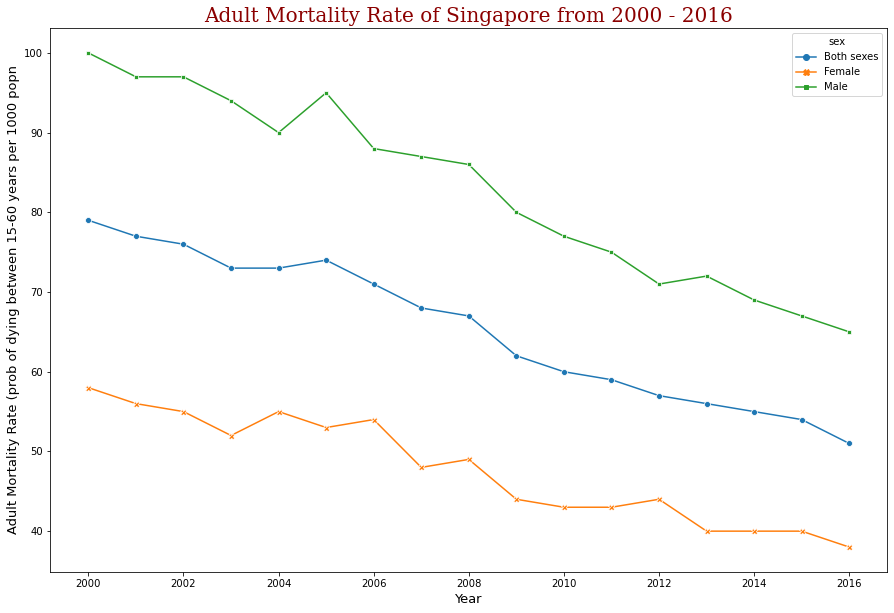

In [4]:
plt.figure(figsize = (15,10))
sns.lineplot(data = singapore_adult_mort, x = 'year', y = 'adult_mortality', hue = 'sex', style = 'sex',markers=True, dashes=False)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Adult Mortality Rate of Singapore from 2000 - 2016', fontdict = font)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn', fontsize = 13)

In [5]:
filter_year2000 = singapore_adult_mort[(singapore_adult_mort.year == 2000)][['adult_mortality','sex']]

In [6]:
singapore_adult_mort = singapore_adult_mort.merge(filter_year2000, on  = 'sex', suffixes =('_current', '_year_2000'))

In [7]:
singapore_adult_mort['Prct_change_since_2000'] = (singapore_adult_mort['adult_mortality_current'] - singapore_adult_mort['adult_mortality_year_2000']) / singapore_adult_mort['adult_mortality_year_2000'] * 100

In [8]:
singapore_adult_mort[singapore_adult_mort.year == 2016]

,year,sex,adult_mortality_current,adult_mortality_year_2000,Prct_change_since_2000
16,2016,Both sexes,51.0,79.0,-35.443038
33,2016,Female,38.0,58.0,-34.482759
50,2016,Male,65.0,100.0,-35.000000


Over the past 16 years since 2000 to 2016, Singapore has seen a drop of 35% and 34.5% Mortality rate for both male and females respectively.

This translates to a significant drop of 2.2% each year. Seems like both men and women enjoy the same improvement in terms of health as measured by the percentage reduction

This is mainly due to increasing standard of living and healthcare provision.

# Top 10 countries with lowest mortality rates

In [9]:
adult_mort_comp = pd.read_sql("""
    SELECT
        country.country,
        year,
        adult_mortality,
        sex,
        continents
    FROM 
        adult_mortality LEFT JOIN country 
    ON 
        adult_mortality.country = country.country
""", conn)

adult_mort_comp

,country,year,adult_mortality,sex,continents
0,Afghanistan,2016,245.0,Both sexes,Asia
1,Afghanistan,2007,294.0,Male,Asia
2,Afghanistan,2007,250.0,Female,Asia
3,Afghanistan,2006,276.0,Both sexes,Asia
4,Afghanistan,2006,296.0,Male,Asia
...,...,...,...,...,...
9328,Zimbabwe,2010,474.0,Female,Africa
9329,Zimbabwe,2009,554.0,Both sexes,Africa
9330,Zimbabwe,2009,586.0,Male,Africa
9331,Zimbabwe,2008,596.0,Both sexes,Africa


In [10]:
# getting top 10 countries with lowest mortalityrates in 2016 for both sexes
top10_mortality = pd.read_sql("""
    SELECT
        country.country,
        year,
        adult_mortality,
        sex,
        continents
    FROM 
        adult_mortality LEFT JOIN country 
    ON 
        adult_mortality.country = country.country
		
	WHERE year = 2016 AND sex = "Both sexes"
	
	ORDER BY adult_mortality ASC
""", conn)

top10_mortality = top10_mortality.head(10)

In [11]:
# filter off only top 10 countries based on mortality rates for both sex first
country_list = top10_mortality.country.tolist()

In [12]:
# define function that takes in which sex category for filtering 

def filter_sex(df,which_sex, year):
    # getting countries with least adult mortality rates 
    df_top10 = df[(df.year == year) & (df.sex == which_sex) ].sort_values(by = 'adult_mortality').head(10)
    
    #generate list for countries 
    country_list = df_top10.country.tolist()

    # filter countries in list 
    df_new = df[(df['country'].isin(country_list) & (df.sex == which_sex))]

    # filter off singapore in another column for line separation 
    df_new.loc[:,'filter_sg'] = df_new.loc[:,'country'].apply(lambda x: 'SG' if x == 'Singapore' else 'Other country')

    return df_new


In [13]:
top10_mortality_male = filter_sex(adult_mort_comp,'Male', 2016)
top10_mortality_male.sort_values(by = ['year','adult_mortality'], ascending = [False,True]).head(10)

c:\Users\Admin\.conda\envs\dsi27tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,country,year,adult_mortality,sex,continents,filter_sg
588,Bahrain,2016,61.0,Male,Asia,Other country
8086,Switzerland,2016,62.0,Male,Europe,Other country
5180,Maldives,2016,63.0,Male,Asia,Other country
8035,Sweden,2016,64.0,Male,Europe,Other country
4261,Japan,2016,65.0,Male,Asia,Other country
7474,Singapore,2016,65.0,Male,Asia,SG
5892,Netherlands,2016,66.0,Male,Europe,Other country
6148,Norway,2016,66.0,Male,Europe,Other country
6659,Qatar,2016,66.0,Male,Asia,Other country
3802,Iceland,2016,67.0,Male,Europe,Other country


In [14]:
# showing different from 2000 to 2016 
diff_sg = top10_mortality_male[top10_mortality_male.country == 'Singapore'].sort_values(by = 'year', ascending = False)

print(f'Percentage difference: {((diff_sg.iloc[0,2] - diff_sg.iloc[-1,2]) / diff_sg.iloc[-1,2]) * 100}%')

Percentage difference: -35.0%


In [15]:
top10_mortality_female = filter_sex(adult_mort_comp,'Female', 2016)
top10_mortality_female.sort_values(by = ['year','adult_mortality'], ascending = [False,True]).head(10)

c:\Users\Admin\.conda\envs\dsi27tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,country,year,adult_mortality,sex,continents,filter_sg
4262,Japan,2016,36.0,Female,Asia,Other country
6710,Republic of Korea,2016,36.0,Female,Asia,Other country
8087,Switzerland,2016,36.0,Female,Europe,Other country
2117,Cyprus,2016,37.0,Female,Europe,Other country
4976,Luxembourg,2016,38.0,Female,Europe,Other country
5282,Malta,2016,38.0,Female,Europe,Other country
7475,Singapore,2016,38.0,Female,Asia,SG
7833,Spain,2016,38.0,Female,Europe,Other country
4160,Italy,2016,39.0,Female,Europe,Other country
5181,Maldives,2016,39.0,Female,Asia,Other country


In [16]:
# showing different from 2000 to 2016 
diff_sg_female = top10_mortality_female[top10_mortality_female.country == 'Singapore'].sort_values(by = 'year', ascending = False)

print(f'Percentage difference: {((diff_sg_female.iloc[0,2] - diff_sg_female.iloc[-1,2]) / diff_sg_female.iloc[-1,2]) * 100}%')

Percentage difference: -34.48275862068966%


Text(0, 0.5, 'Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn')

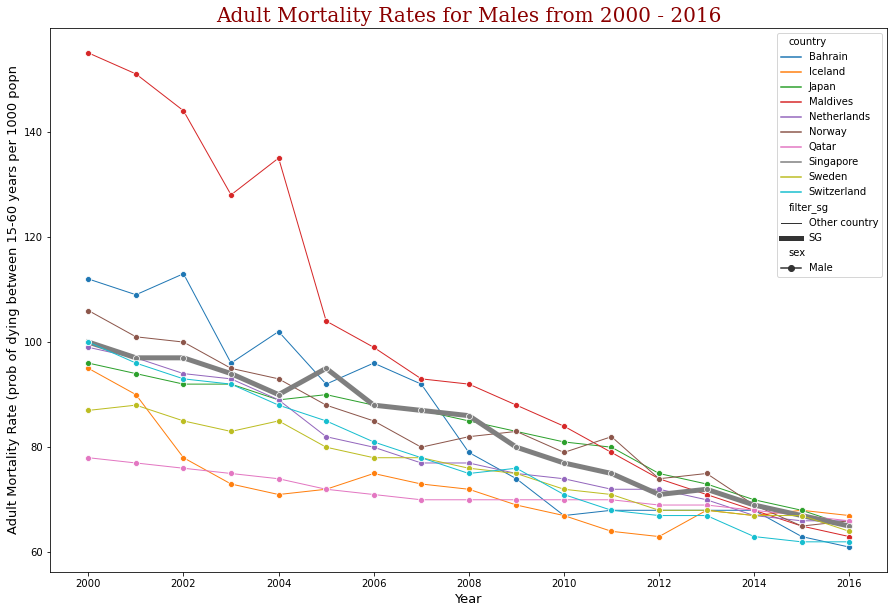

In [17]:
# Plotting for male

plt.figure(figsize = (15,10))
sns.lineplot(data = top10_mortality_male, x = 'year', y = 'adult_mortality', hue = 'country', style = 'sex',markers=True, dashes=False, size = 'filter_sg', sizes = {'SG': 5, 'Other country': 1})

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Adult Mortality Rates for Males from 2000 - 2016', fontdict = font)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn', fontsize = 13)

Text(0, 0.5, 'Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn')

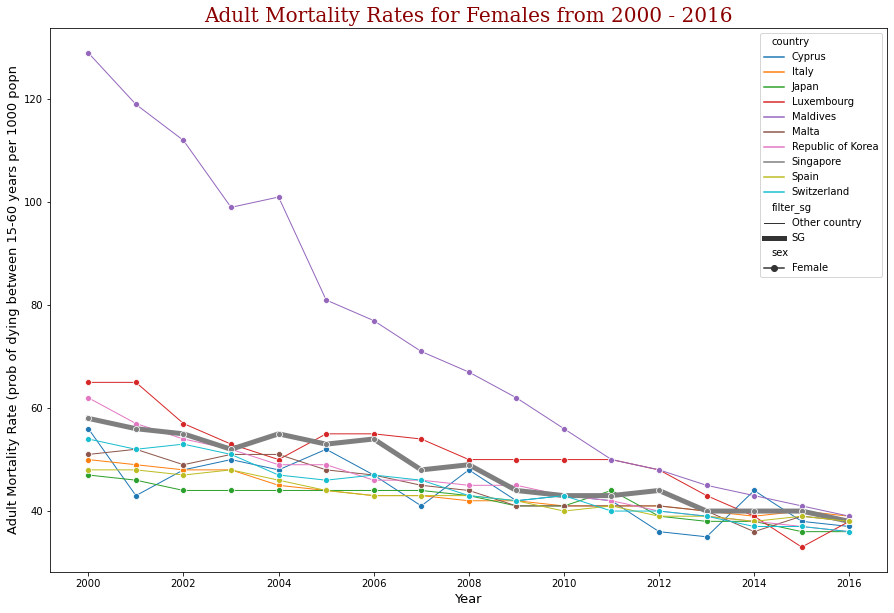

In [18]:
# Plotting for female

plt.figure(figsize = (15,10))
sns.lineplot(data = top10_mortality_female, x = 'year', y = 'adult_mortality', hue = 'country', style = 'sex',markers=True, dashes=False, size = 'filter_sg', sizes = {'SG': 5, 'Other country': 1})
plt.title('Adult Mortality Rates for Females from 2000 - 2016', fontdict = font)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Adult Mortality Rate (prob of dying between 15-60 years per 1000 popn', fontsize = 13)

On 2016, Singapore is ranked `6th place` for having lowest `male` adult mortality while ranking `7th place` for having lowest `female` adult mortality rate. 

For Singapore, the study suggests a **relatively steady decline of about 2.1-2.2% each year over the span of 16 year** for both men and women. 

There is **comparatively steeper improvement of Males in Singapore**, whereby for every 1000 population, the number of deaths decreased from 100 to 65, -2.2% decrease as compared most of the other top few countries. For example, Iceland has a decline in adult mortality of about -1.8% per year. 

This is stark difference between the rate of decrease coming from both Males and Females from Maldives in particular. 

# Under-five mortality rate (deaths per 1000 live births) from 2013 to 2018

I will like to include comparison across `continents`, `Singapore`, and `Worldwide`

In [19]:
udr5_mortality_continents = pd.read_sql("""
    SELECT 
        continents, year, AVG(prob_underfivedeath) AS prob_underfivedeath
    FROM 
        prob_underfivedeath LEFT JOIN country
    ON 
        prob_underfivedeath.country = country.country
    WHERE 
        sex == "Both sexes"
    GROUP BY 
        continents, year
    ORDER BY 
        AVG(prob_underfivedeath) DESC
""", conn)

udr5_mortality_continents

,continents,year,prob_underfivedeath
0,Africa,2013,73.144444
1,Africa,2014,70.446296
2,Africa,2015,67.950000
3,Africa,2016,65.492593
4,Africa,2017,63.274074
5,Africa,2018,61.185185
6,Oceania,2013,27.162500
7,Oceania,2014,26.556250
8,Oceania,2015,25.925000
9,Asia,2013,25.556818


In [20]:
udr5_mortality_SG = pd.read_sql("""
    SELECT 
        prob_underfivedeath.country, year, AVG(prob_underfivedeath) AS prob_underfivedeath
    FROM 
        prob_underfivedeath LEFT JOIN country
    ON 
        prob_underfivedeath.country = country.country
    WHERE 
        prob_underfivedeath.country = "Singapore"
    GROUP BY 
        year
""", conn)

# rename to pd.concat later 
# from country to continents 
udr5_mortality_SG.columns = ['continents','year','prob_underfivedeath']
udr5_mortality_SG

,continents,year,prob_underfivedeath
0,Singapore,2013,2.700000
1,Singapore,2014,2.700000
2,Singapore,2015,2.700000
3,Singapore,2016,2.733333
4,Singapore,2017,2.800000
5,Singapore,2018,2.800000


In [21]:
udr5_mortality_world = pd.read_sql("""
    SELECT 
        year, AVG(prob_underfivedeath) AS prob_underfivedeath
    FROM 
        prob_underfivedeath LEFT JOIN country
    ON 
        prob_underfivedeath.country = country.country
    GROUP BY 
        year
""", conn)

# rename column and add 'world'
# rename to pd.concat later 
# from country to continents

udr5_mortality_world['country'] = 'World'
udr5_mortality_world.columns = ['year','prob_underfivedeath','continents']

udr5_mortality_world

,year,prob_underfivedeath,continents
0,2013,33.230412,World
1,2014,32.072852,World
2,2015,30.998797,World
3,2016,29.973368,World
4,2017,28.980584,World
5,2018,28.038832,World


In [22]:
# combine all dataframes together
combine_udr5 = pd.concat([udr5_mortality_continents,udr5_mortality_SG,udr5_mortality_world],axis = 0)

In [23]:
# round up to 1 decimal place
combine_udr5.prob_underfivedeath = combine_udr5.prob_underfivedeath.apply(lambda x: round(x,1))
combine_udr5

,continents,year,prob_underfivedeath
0,Africa,2013,73.1
1,Africa,2014,70.4
2,Africa,2015,68.0
3,Africa,2016,65.5
4,Africa,2017,63.3
5,Africa,2018,61.2
6,Oceania,2013,27.2
7,Oceania,2014,26.6
8,Oceania,2015,25.9
9,Asia,2013,25.6


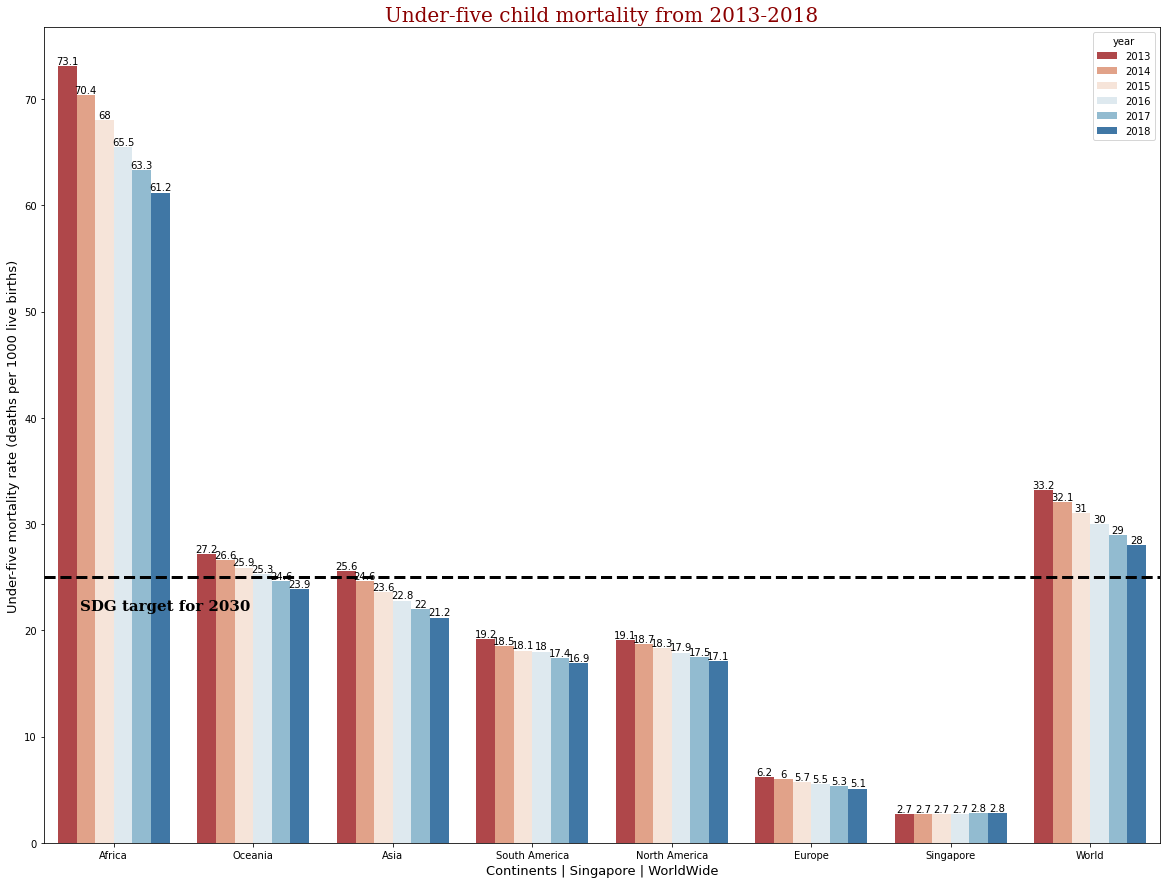

In [24]:
# filter off only top 10 countries
plt.figure(figsize = (20,15))

# set pallete colour 
pal1 = sns.color_palette("RdBu_r", len(combine_udr5['year'].unique()));

# plot barplot 
ax = sns.barplot(data = combine_udr5, x = 'continents', y = 'prob_underfivedeath', hue = 'year', palette=np.array(pal1[::-1]))
plt.title('Under-five child mortality from 2013-2018', fontdict = font)
plt.ylabel('Under-five mortality rate (deaths per 1000 live births)', fontsize = 13)
plt.xlabel('Continents | Singapore | WorldWide', fontsize = 13)

#Drawing a horizontal line at point 1.25
ax.axhline(25, linewidth = 3, linestyle='--', color = 'black')

font2  = {'family': 'serif',
'color':  'black',
'weight': 'bold',
'size': 15,
}
# plot figure text on WHO line = 25
plt.figtext(x=0.15, y=0.34, s=f"SDG target for 2030", fontdict=font2)

# plot label on top of bars
for i in ax.containers:
    ax.bar_label(i,)

By 2016, most continents have already met the Sustainable Development Goals (SDG) target of at least as low as 25 deaths per 1000 live births by 2030 ([UNICEF](https://data.unicef.org/topic/child-survival/child-survival-sdgs/#:~:text=The%20proposed%20SDG%20target%20for,deaths%20per%201%2C000%20live%20births.))

Comparatively, Singapore has done well in maintaining very low under-five mortality rates as compared to Asia and across the world, suggesting the its effective health care system that are accessible to the majority of the population. According to ([Bloomberg Global Heath](https://www.internationalinsurance.com/health/systems/singapore.php#:~:text=The%20Economist%20Intelligence%20Unit%20placed,extremely%20high%20standard%20of%20living.)) of 163 countries ranked Singapore the `4th healthiest country in the world`. This excellent level of healthcare means that Singaporeans enjoy a substantial amount of standard of living. 

Globally, infectious diseases, including pneumonia, diarrhoea and malaria, along with pre-term birth complications, birth asphyxia and trauma and congenital anomalies remain the leading causes of death for children under five ([WHO](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/child-mortality-and-causes-of-death#:~:text=Globally%2C%20infectious%20diseases%2C%20including%20pneumonia,death%20for%20children%20under%20five.)). 

To curb this, in 1966 Singapore government established a national family planning program. This program, together with nutrition education, improved housing and promotion of breastfeeding has raised the nutrition level.([NIH](https://pubmed.ncbi.nlm.nih.gov/7137909/))

In [25]:
conn.close()